In [1]:
!wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv

--2019-03-04 23:07:13--  https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv [переход]
--2019-03-04 23:07:14--  https://www.dropbox.com/s/raw/nd7v1fod89xla6j/vk_texts_with_sources.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://ucd4f9bfb1c342c3e972240f70d1.dl.dropboxusercontent.com/cd/0/inline/AcfCUtOhNQXUEz6qhi7m2JXDiK5prOau2aPZv6h2MVrNXVYl9rEgwX5V-XNiK7-hIcEHeNlg8avUvAGH9Pf7Fs_-ghu88p3U48AOSzlM6djauGY0qKKzE06ZwM06wlZOyzk/file# [переход]
--2019-03-04 23:07:14--  https://ucd4f9bfb1c342c3e972240f70d1.dl.dropboxusercontent.com/cd/0/inline/AcfCUtOhNQXUEz6qhi7m2JXDiK5prOau2aPZv6h2MVrNXVYl9rEgwX5V-XNiK7-hIcEHeNlg8avUvAGH9Pf7Fs_-gh

In [2]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


## Задание 1
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [13]:
df.count()

text      11625
source    11625
dtype: int64

In [2]:
n_texts = len(df) #кол-во текстов
n_categories = len(df.source.value_counts()) #кол-во классов
print(n_texts, n_categories)

11625 4


In [6]:
df.source.value_counts()

mchsgov        3030
mil            3030
mospolice      2910
russianpost    2655
Name: source, dtype: int64

In [3]:
#избавляемся от <br> в тексте
import re

for i in df.index:
    df.loc[i, "text"] = re.sub('<.*?>', ' ', str(df.text[i]))        

In [32]:
from string import punctuation
punct = punctuation+'«»—…“”*№–'

words = []
for text in df.text:
    text = text.split()
    for word in text:
        words.append(word.strip(punct))
words = [w.lower() for w in words if w]

wordcount = len(set(words)) #число уникальных слов без лемматизации
wordcount

84725

In [34]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
words_lemmatized = [morph.parse(w)[0].normal_form for w in words]

In [12]:
lemma_wordcount = len(set(words_lemmatized)) #число уникальных слов с лемматизацией
lemma_wordcount 

39129

In [6]:
import numpy as np

word_lists = [[w.strip(punct) for w in text.split() if w.strip(punct)] for text in df.text]
mean_words = np.mean([len(text) for text in word_lists]) #среднее число слов в тексте
mean_words

83.911913978494624

In [7]:
len(word_lists) == len(df.index)

True

In [13]:
symbol_lists = [[s for s in text] for text in df.text]
mean_symbols = np.mean([len(text) for text in symbol_lists]) #среднее число символов в тексте
mean_symbols

667.45255913978497

In [14]:
df.source.value_counts()

mchsgov        3030
mil            3030
mospolice      2910
russianpost    2655
Name: source, dtype: int64

Для нахождения 5 самых частотных сущствительных в каждом классе создадим словарь вида "класс-тексты этого класса" и напишем программу, которая посчитает 5 самых частотных существительных в каждом классе и запишет в словарь. 

In [47]:
classes = ['mchsgov', 'mil', 'mospolice', 'russianpost']
dictionary = {}
for i in classes:
    text = ' '.join(df.loc[df["source"]==i].text)
    dictionary[i] = text

In [48]:
from collections import Counter


def get_five_nouns(dictionary):
    most_common = {}
    for class_, text in dictionary.items():
        words = []
        text = text.split()
        for word in text:
            words.append(word.strip(punct))
        words = [w.lower() for w in words if w]
        nouns = [morph.parse(w)[0].normal_form for w in text if w and morph.parse(w)[0].tag.POS == 'NOUN'] 
        five_nouns = [n[0] for n in Counter(nouns).most_common(5)]
        most_common[class_] = five_nouns
    return most_common

In [ ]:
nouns = get_five_nouns(dictionary) 

In [18]:
nouns #5 самых частых существительных в текстах каждого паблика

{'mchsgov': ['#мчс', '#мчсроссия', 'мчс', 'россия', 'спасатель'],
 'mil': ['#минобороны', 'военный', 'россия', 'год', 'оборона'],
 'mospolice': ['россия', 'мвд', 'москва', 'полиция', 'сотрудник'],
 'russianpost': ['почта', 'россия', 'год', 'отделение', '#почтароссия']}

In [35]:
#для последующих заданий лемматизируем word_lists и добавим их в датафрейм
word_lists = [[w.strip(punct) for w in text.split() if w.strip(punct)] for text in df.text]
lemmas_list = []
for list_ in word_lists:
    lemmas = [morph.parse(w)[0].normal_form for w in list_]
    lemmas_list.append(lemmas)

In [36]:
df.insert(loc = 2, column = 'lemmas', value = lemmas_list)
df.head()

,text,source,lemmas
0,Начальник Главного оперативного управления Ген...,mil,"[начальник, главный, оперативный, управление, ..."
1,Артиллерийские подразделения общевойскового об...,mil,"[артиллерийский, подразделение, общевойсковой,..."
2,Подразделения морской пехоты Каспийской флотил...,mil,"[подразделение, морской, пехота, каспийский, ф..."
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[команда, на, всеармейский, этап, конкурс, арм..."
4,На большом учебно-методическом командирском сб...,mil,"[на, большой, учебно-методический, командирски..."


Разделим коллекцию текстов на обучающую и тестовую части. 

In [37]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

data = shuffle(df)

train, test = train_test_split(data, test_size=0.1)

## Задание 2. Классификация по правилам

### 1. Потестируем первый правиловый классификатор

In [38]:
import random

def rule_classifier1(text):
    if 'мчс' in text:
        return 'mchsgov'
    elif 'оборона' in text:
        return 'mil'
    elif 'мвд' in text:
        return 'mospolice'
    elif 'почта' in text:
        return'russianpost'
    elif '#мчс' in text:
        return 'mchsgov'
    elif '#мчсроссия' in text:
        return 'mchsgov'
    elif 'полиция' in text:
        return 'mospolice'
    elif 'отделение' in text:
        return 'russianpost'
    else:
        return random.choice(['mchsgov', 'mospolice', 'russianpost', 'mil']) 
    #использем random.choice для определения класса текстов, в которых нет слов из правил

In [39]:
predictions = []
for text in test.lemmas:
    class_ = rule_classifier1(text)
    if class_ == None:
        predictions.append('')
    else:
        predictions.append(class_)
print(predictions[:20])

['mil', 'russianpost', 'mchsgov', 'mospolice', 'russianpost', 'mil', 'russianpost', 'russianpost', 'mil', 'mil', 'mchsgov', 'mchsgov', 'mchsgov', 'mospolice', 'russianpost', 'mospolice', 'mospolice', 'mospolice', 'mospolice', 'russianpost']


In [40]:
predictions_array = np.asarray(predictions)

In [41]:
from sklearn.metrics import *
def evaluate(right_classes, predicted_classes):
    # макро-усреднение
    print("Precision: {0:6.2f}".format(precision_score(right_classes, predicted_classes, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(right_classes, predicted_classes, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(right_classes, predicted_classes, average='macro')))

    print("...")
    # микро-усреднение
    print("Precision: {0:6.2f}".format(precision_score(right_classes, predicted_classes, average='micro')))
    print("Recall: {0:6.2f}".format(recall_score(right_classes, predicted_classes, average='micro')))
    print("F1-measure: {0:6.2f}".format(f1_score(right_classes, predicted_classes, average='micro')))

    print("...")
    # accuracy
    print("Accuracy: {0:6.2f}".format(accuracy_score(right_classes, predicted_classes)))

In [42]:
evaluate(test.source, predictions_array)

Precision:   0.72
Recall:   0.73
F1-measure:   0.71
...
Precision:   0.72
Recall:   0.72
F1-measure:   0.72
...
Accuracy:   0.72


In [28]:
print(classification_report(test.source, predictions_array)) 

             precision    recall  f1-score   support

    mchsgov       0.75      0.84      0.79       329
        mil       0.70      0.34      0.46       283
  mospolice       0.71      0.96      0.82       279
russianpost       0.66      0.68      0.67       272

avg / total       0.71      0.71      0.69      1163



### 2. Потестируем второй классификатор, в котором класс определяется максимальным пересечением множеств слов текста и 5 самых частотных существительных класса

In [43]:
def rule_classifier2(text, nouns):
    text = set(text)
    overlaps = []
    for class_, words in nouns.items():
        overlap = text & set(words)
        overlaps.append(tuple([class_, overlap]))
    
    max_overlap = 0
    for overlap in overlaps:
        if len(overlap[1]) > max_overlap:
            max_overlap = len(overlap[1])
    
    for overlap in overlaps:
        if max_overlap == len(overlap[1]):
            return(overlap[0])

In [44]:
predictions2 = []
for text in test.lemmas:
    class_ = rule_classifier2(text, nouns)
    predictions2.append(class_)
predictions2[:20]

NameError: name 'nouns' is not defined

In [16]:
predictions_array2 = np.asarray(predictions2)
evaluate(test.source, predictions_array2)

NameError: name 'predictions2' is not defined

In [32]:
print(classification_report(test.source, predictions_array2)) 

             precision    recall  f1-score   support

    mchsgov       0.57      0.93      0.71       329
        mil       0.66      0.44      0.53       283
  mospolice       0.88      0.95      0.91       279
russianpost       0.95      0.50      0.65       272

avg / total       0.76      0.71      0.70      1163



Как видно из результатов, мы не смогли придумать правило, которое никогда не ошибается.  

## Задание 3 [4 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


### 1. Попробуем мультиномиальный Байес 

In [33]:
test.text.head()

239      Воспитанник Аксайского казачьего кадетского ко...
321      Этап конкурса «Рембат» по эвакуации неисправно...
349      Экипажи двух противолодочных самолетов Ил-38 С...
10178    Полицейские задержали подозреваемых в разбойно...
4284     #БудниМЧС #МЧС #МЧСРОССИИ   Собачий нос надежн...
Name: text, dtype: object

In [17]:
from sklearn.feature_extraction.text import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = MultinomialNB()

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])
%time clf.fit(train.text, train.source)

CPU times: user 5.43 s, sys: 307 ms, total: 5.73 s
Wall time: 5.87 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [18]:
predictions3 = clf.predict(test.text)
evaluate(test.source, predictions3)

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.source, predictions3)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuRd")
plt.title("Confusion matrix")
plt.show()

NameError: name 'predictions3' is not defined

Мультиномиальный байес сработал неплохо. Попробуем другие:

In [37]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = LogisticRegression() #пробуем логистическую регрессию

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 11.5 s, sys: 479 ms, total: 11.9 s
Wall time: 9.15 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


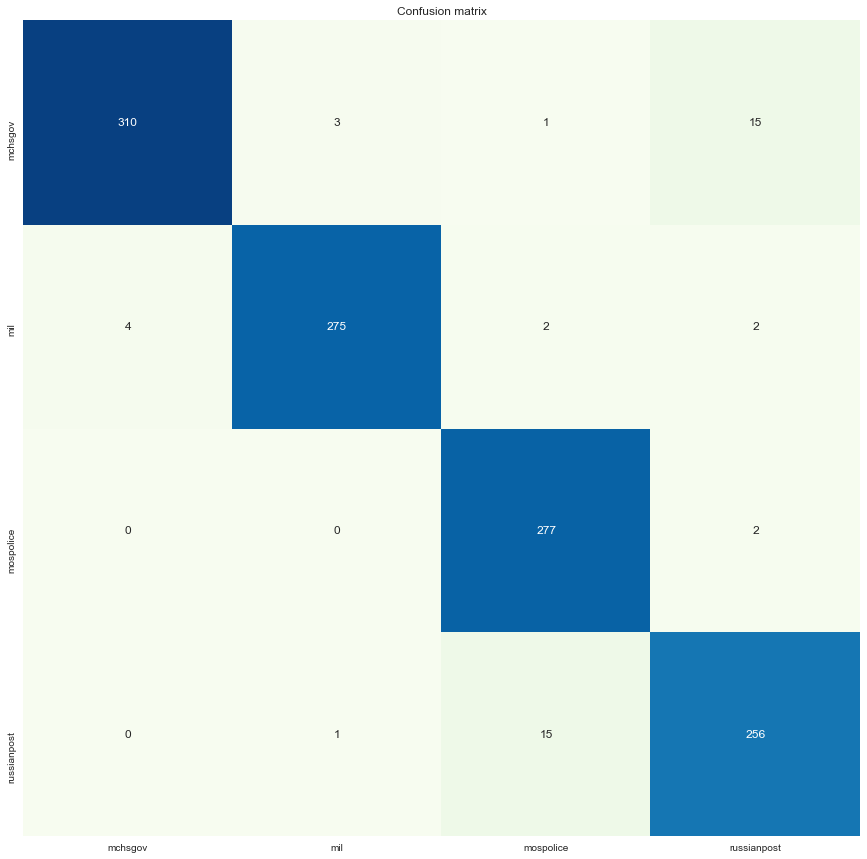

In [38]:
predictions4 = clf.predict(test.text)
evaluate(test.source, predictions4)

m = confusion_matrix(test.source, predictions4)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="GnBu")
plt.title("Confusion matrix")
plt.show()

In [39]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
classifier = RandomForestClassifier() #пробуем случайный лес

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 18.3 s, sys: 355 ms, total: 18.6 s
Wall time: 18.7 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Precision:   0.94
Recall:   0.94
F1-measure:   0.94
...
Precision:   0.94
Recall:   0.94
F1-measure:   0.94
...
Accuracy:   0.94


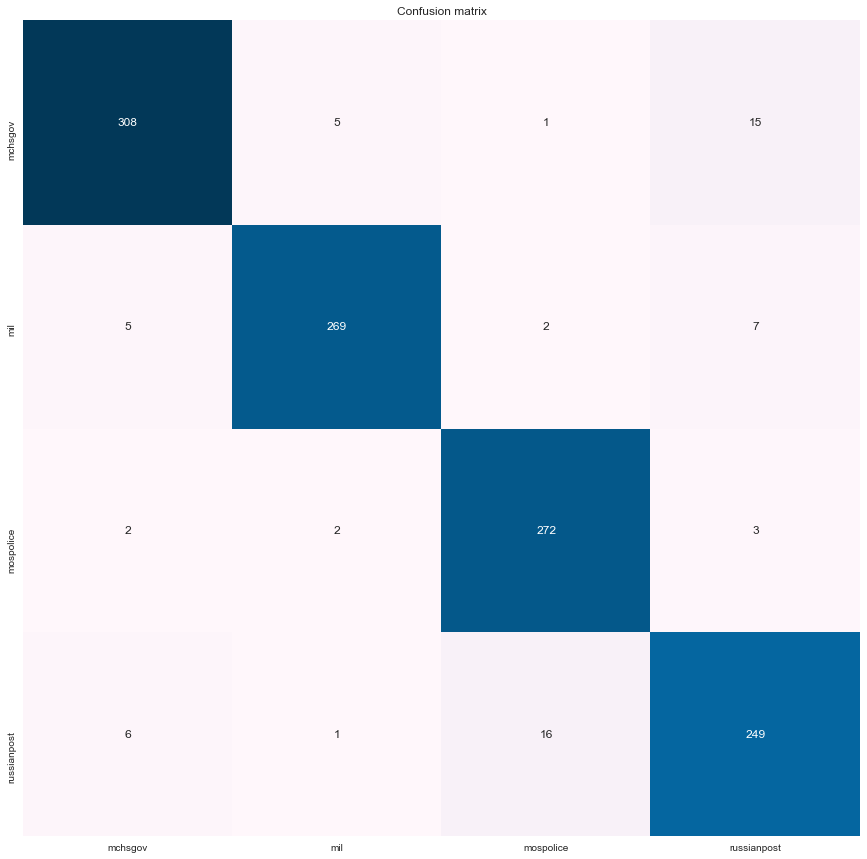

In [40]:
predictions5 = clf.predict(test.text)
evaluate(test.source, predictions5)

m = confusion_matrix(test.source, predictions5)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

### Как мы видим, F-меру 0.96 показали мультиномиальный Байес и логистическая регрессия - возьмем эту цифру за baseline

## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [20]:
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = LogisticRegression() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

CPU times: user 38 s, sys: 12.8 s, total: 50.8 s
Wall time: 45.8 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


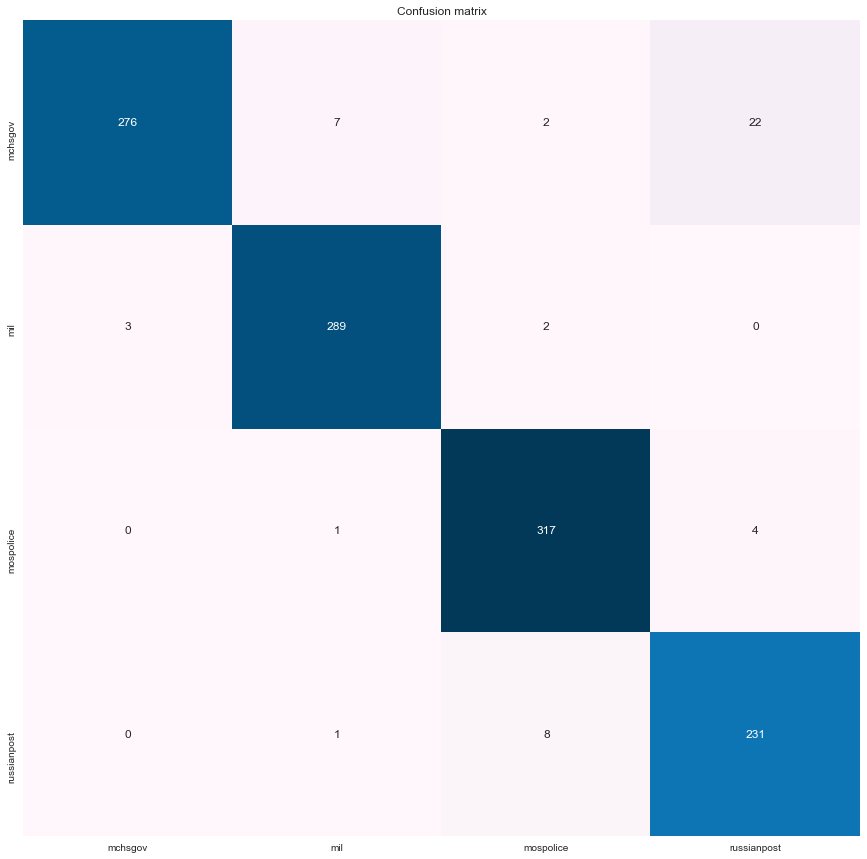

In [21]:
predictions6 = clf.predict(test.text)
evaluate(test.source, predictions6)

m = confusion_matrix(test.source, predictions6)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

После снижения размерности F-мера не улучшилась. 

## после снижения размерности методом LSA мы можем использовать те классификаторы, которые принимают на вход в качестве X и положительные, и отрицательные значения. Если мы будем использовать вероятностные методы снижения размерности, то область определения классификатора должна быть от 0 до 1. 

CPU times: user 36.9 s, sys: 13.7 s, total: 50.6 s
Wall time: 48.3 s
Precision:   0.97
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


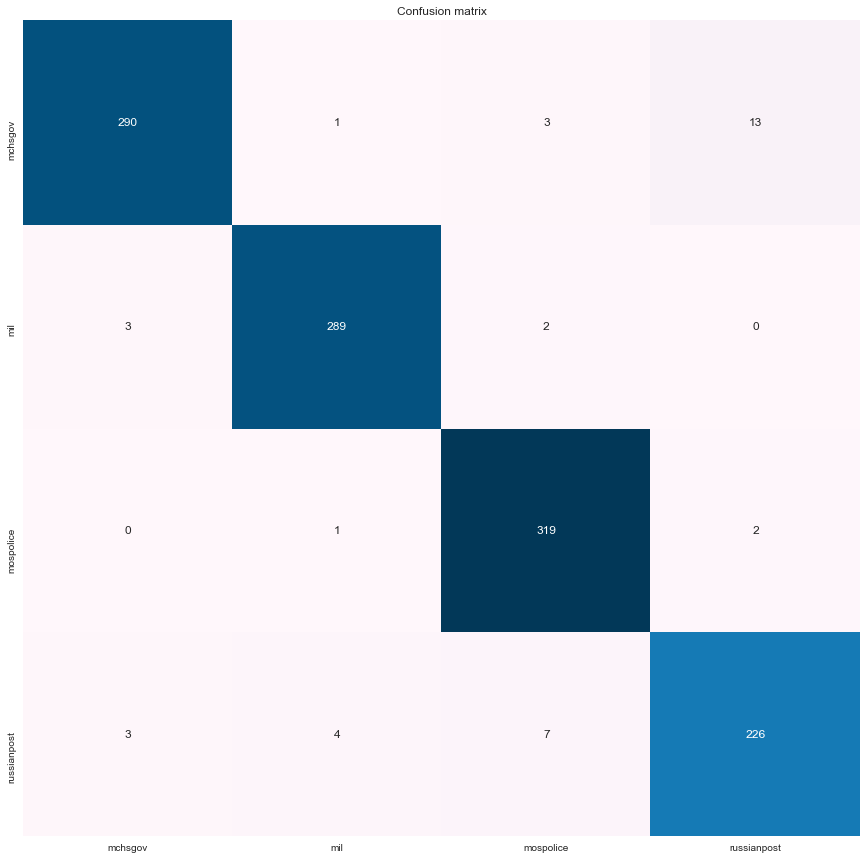

In [25]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)
predictions7 = clf.predict(test.text)
evaluate(test.source, predictions7)

m = confusion_matrix(test.source, predictions7)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Ура! С LSA и случайным лесом мы улучшили F-меру до 0.97. Теперь попробуем вероятностную LDA + мультиномиальный Байес.

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

In [35]:
vectorizer = CountVectorizer(ngram_range=(1,2)) 
tfidf = TfidfTransformer()
lda = LatentDirichletAllocation(n_components=10, max_iter = 5) #возьмем 10 тем
classifier = MultinomialNB() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('lda', lda),
    ('clf', classifier)
])

%time clf.fit(train.text, train.source)

/Users/anyway/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


CPU times: user 2min, sys: 8.51 s, total: 2min 9s
Wall time: 2min 12s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...samples=1000000.0, verbose=0)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Precision:   0.79
Recall:   0.71
F1-measure:   0.72
...
Precision:   0.71
Recall:   0.71
F1-measure:   0.71
...
Accuracy:   0.71


/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/anyway/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


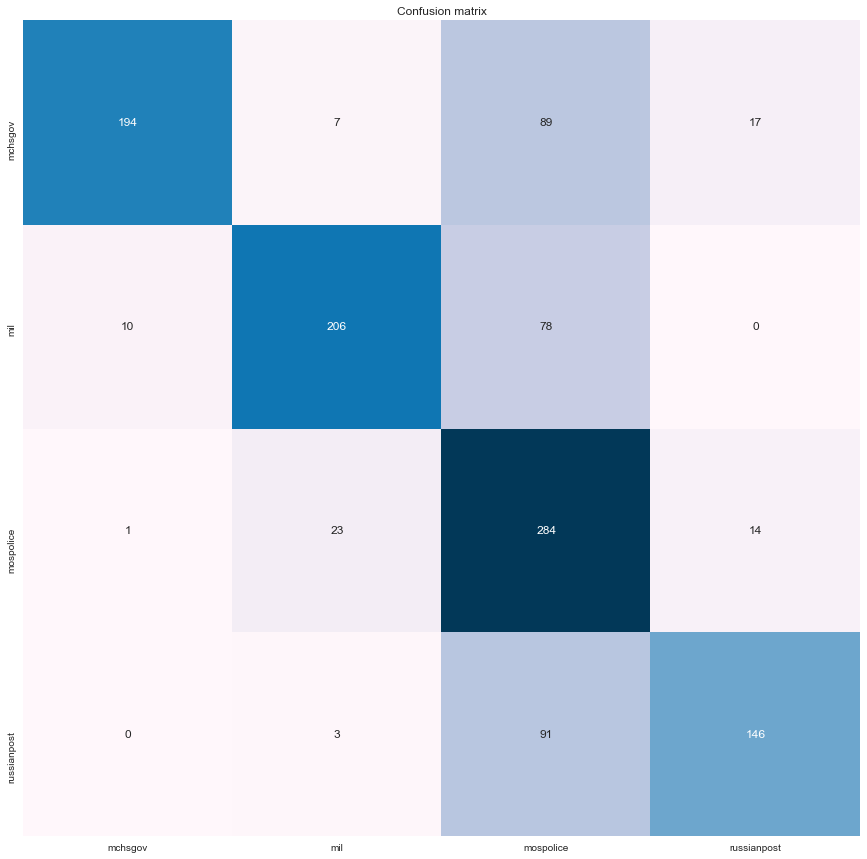

In [36]:
predictions8 = clf.predict(test.text)
evaluate(test.source, predictions8)

m = confusion_matrix(test.source, predictions8)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

## Задание 5 [2 балла]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

Проверим, как изменятся результаты в случае лучшего варианта: TruncatedSVD + Random Forest Classifier 

In [44]:
train_set = [' '.join(text) for text in train.lemmas]
test_set = [' '.join(text) for text in test.lemmas]

CPU times: user 30.3 s, sys: 9.55 s, total: 39.8 s
Wall time: 36.4 s
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.97
Recall:   0.97
F1-measure:   0.97
...
Accuracy:   0.97


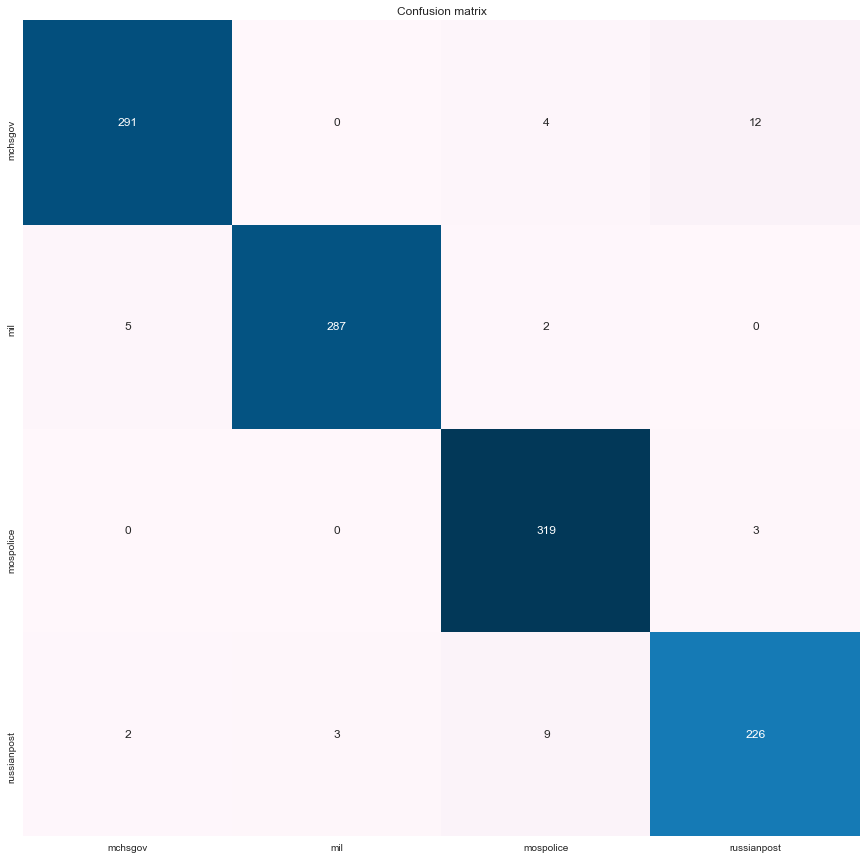

In [49]:
vectorizer = CountVectorizer(ngram_range=(1,2)) #используем на униграммах и биграммах
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])


%time clf.fit(train_set, train.source) #используем на лемматизированных текстах
predictions10 = clf.predict(test_set)
evaluate(test.source, predictions10)

m = confusion_matrix(test.source, predictions10)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Качество классификации еще немного улучшилось - теперь твердые 0.97.

Попробуем просто на словах: 

CPU times: user 6.46 s, sys: 4.9 s, total: 11.4 s
Wall time: 21.2 s
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


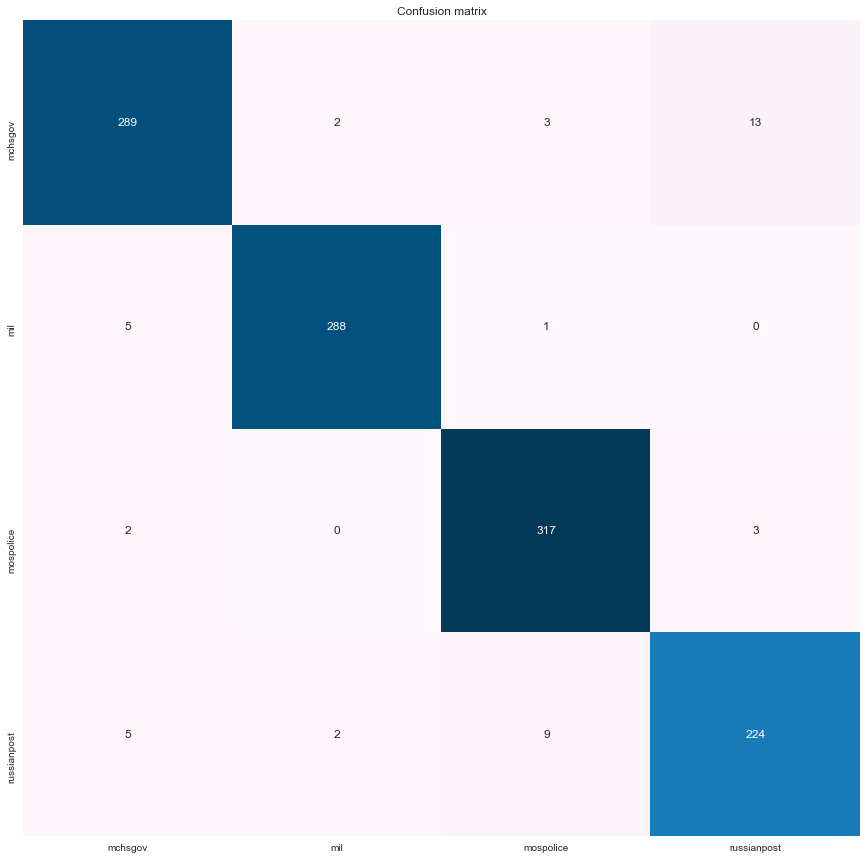

In [48]:
vectorizer = CountVectorizer(ngram_range=(1,1)) #возьмем просто слова
tfidf = TfidfTransformer()
svd = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
classifier = RandomForestClassifier() 

clf = Pipeline([
    ('vect', vectorizer),
    ('tfidf', tfidf),
    ('svd', svd),
    ('clf', classifier)
])


%time clf.fit(train_set, train.source) #используем на лемматизированных текстах
predictions11 = clf.predict(test_set)
evaluate(test.source, predictions11)

m = confusion_matrix(test.source, predictions11)

labels = clf.classes_
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

Просто со словами вышло хуже, но это не удивительно. Те же результаты получаются, если взять униграммы, биграммы и триграммы (ngram_range=(1,3)). 

## Задание 6 [4 балла]. Модель скрытых тем
Построим скрытую модель LDA по данной коллекции текстов. 

Здесь не нужно разделять корпус на тестовую и обучающую части, поскольку темы выявляются во всем датасете. 

Модель скрытых тем позволяет увидеть, почему тот или иной класс распознается классификаторами плохо. Темы - это наборы слов, наиболее характерные для того или иного класса (ключевые слова в своем роде). Мы можем видеть, у каких слов больший вес в том или ином классе и предполагать, почему некоторым текстам присваивается иной класс: например, потому что там нет слов, характерных для того или иного класса. Также через модель скрытых тем можно посмотреть, что еще сделать с текстами, чтобы они лучше определялись: например, какие еще стоп-слова можно выбросить.  

Сначала предобработаем текст: уберем стоп-слова и т.д.  

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
%time
import re
from nltk.corpus import stopwords
regex = re.compile("[А-Яа-я]+")

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', 'г']
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой', 'год', 'время', 'день', 'весь']

from pymystem3 import Mystem

m = Mystem()

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
    
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""



df.text = df.text.apply(lemmatize)
df.text = df.text.str.lower()
df.text = df.text.apply(words_only)
df.text = df.text.apply(remove_stopwords)  
df.text = df.text.apply(remove_stoplemmas)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.2 µs


Представляем данных в Gensim словарем и корпусом:

In [11]:
from gensim.corpora import *
texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [12]:
print(dictionary)

Dictionary(17151 unique tokens: ['начальник', 'главный', 'оперативный', 'управление', 'генеральный']...)


Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [13]:
%%time
from gensim.models import  *
from gensim import similarities

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

CPU times: user 2min 45s, sys: 5.15 s, total: 2min 50s
Wall time: 51.9 s


In [14]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4,
                        alpha='auto', eta='auto', iterations = 10, passes = 5)

CPU times: user 17.8 s, sys: 253 ms, total: 18.1 s
Wall time: 18.2 s


In [15]:
lda.show_topics(4)

[(0,
  '0.018*"россия" + 0.011*"почта" + 0.010*"почтовый" + 0.008*"мчс" + 0.007*"пожарный" + 0.007*"отделение" + 0.006*"почтароссия" + 0.004*"открытка" + 0.004*"москва" + 0.004*"первый"'),
 (1,
  '0.010*"военный" + 0.010*"минобороны" + 0.008*"боевой" + 0.007*"учение" + 0.006*"корабль" + 0.006*"экипаж" + 0.006*"комплекс" + 0.005*"флот" + 0.005*"морской" + 0.005*"выполнять"'),
 (2,
  '0.048*"мчс" + 0.025*"мчсроссия" + 0.019*"россия" + 0.010*"спасатель" + 0.008*"спасательный" + 0.007*"помощь" + 0.007*"человек" + 0.007*"пожарный" + 0.006*"пожар" + 0.006*"безопасность"'),
 (3,
  '0.016*"россия" + 0.014*"военный" + 0.012*"российский" + 0.009*"оборона" + 0.008*"министр" + 0.006*"сергей" + 0.006*"шойгу" + 0.006*"глава" + 0.006*"сила" + 0.005*"страна"')]

Мы видим, что класс МВД куда-то потерялся, зато есть 2 класса Минобороны. 

In [16]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

## Задание 8
Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [28]:
import fasttext

In [8]:
with open('data_for_fasttext.txt', 'w', encoding = 'UTF-8') as f:
    for i in train.index:
        text = str(df.text[i])
        label = str(df.source[i])
        f.write(text + ' ' + '__label__' + label + '\n')

In [11]:
classifier = fasttext.supervised('data_for_fasttext.txt', 'model', label_prefix='__label__')

In [27]:
result = classifier.predict([text for text in test.text])

In [20]:
evaluate(result, test.source)

Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Precision:   0.96
Recall:   0.96
F1-measure:   0.96
...
Accuracy:   0.96


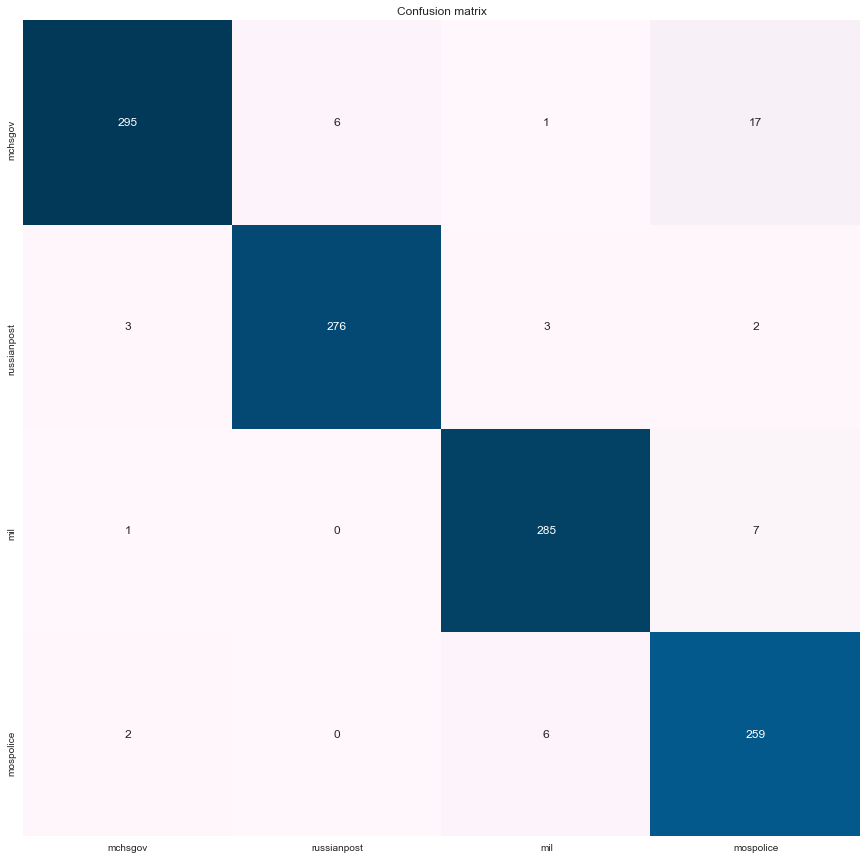

In [25]:
m = confusion_matrix(test.source, result)

labels = ['mchsgov', 'russianpost', 'mil', 'mospolice']
plt.figure(figsize = (15,15))
sns.heatmap(data=m, annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels, cmap="PuBu")
plt.title("Confusion matrix")
plt.show()

FastText показал не самую лучшую F-меру. Мы видим, что классификатор присвоил многим текстам МЧС класс московской полиции (возможно, между этими двумя классами больше всего пересечений слов). 